The dataset under analysis includes 99 records with 13 attributes that capture essential demographic and financial details, such as age, profession, marital status, education, number of dependents, personal and house loans, and vehicle purchase details. The dataset provides a comprehensive view of potential EV customers, allowing for an in-depth exploration of the factors influencing vehicle purchase decisions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data=pd.read_csv('vehicle.csv')

In [3]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


Age: Age of the individual.

Profession: Occupation of the individual (e.g., Salaried, Business).

Marital Status: Marital status of the individual.

Education: Educational qualification.

No of Dependents: Number of dependents.

Personal loan: Whether the individual has a personal loan.

House Loan: Whether the individual has a house loan.

Wife Working: Whether the spouse is working.

Salary: Salary of the individual.

Wife Salary: Salary of the spouse.

Total Salary: Combined salary.

Make: Make/model of the vehicle purchased.

Price: Price of the vehicle.

In [4]:
print('shape of data',data.shape)

shape of data (99, 13)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


The average age is approximately 36.3 years, with a standard deviation of 6.25 years.

The average salary is around 1.74 million, with a wide range from 200,000 to 3.8 million.

The average wife’s salary is about 534,343, with some having no income.

The average vehicle price is around 1.19 million, with a range from 110,000 to 3 million.

In [7]:
data.describe(include='O')

,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working,Make
count,99,99,99,99,99,99,99
unique,2,2,2,2,2,3,9
top,Salaried,Married,Post Graduate,No,No,Yes,SUV
freq,64,84,56,67,62,52,19


Profession: There are two professions - "Salaried" (64 instances) and "Business" (35 instances).
    
Marital Status: Majority are married (84 instances).
    
Education: Most individuals have a "Post Graduate" education (56 instances).
    
Personal Loan, House Loan, Wife Working: These features have binary values (Yes/No).

In [8]:
data['Wife Working'].value_counts()

Yes    52
No     46
m       1
Name: Wife Working, dtype: int64

In [9]:
data['Wife Working']=data['Wife Working'].map({'m':'Yes','Yes':'Yes','No':'No'})

In [10]:
##Check for missing values
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

There are no missing values in the dataset.

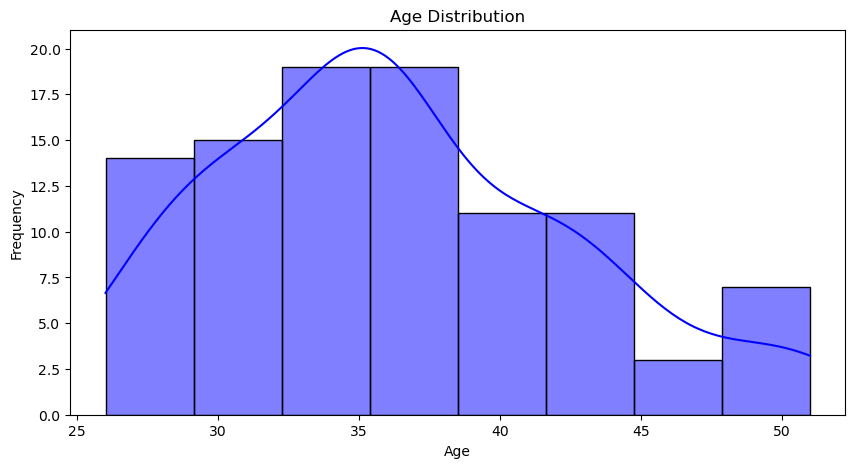

In [11]:
# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

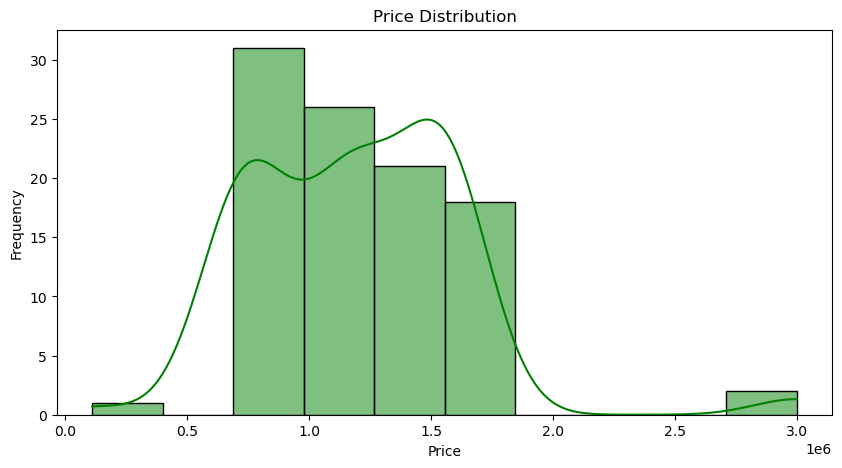

In [12]:
# Distribution of Price
plt.figure(figsize=(10, 5))
sns.histplot(data['Price'], kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

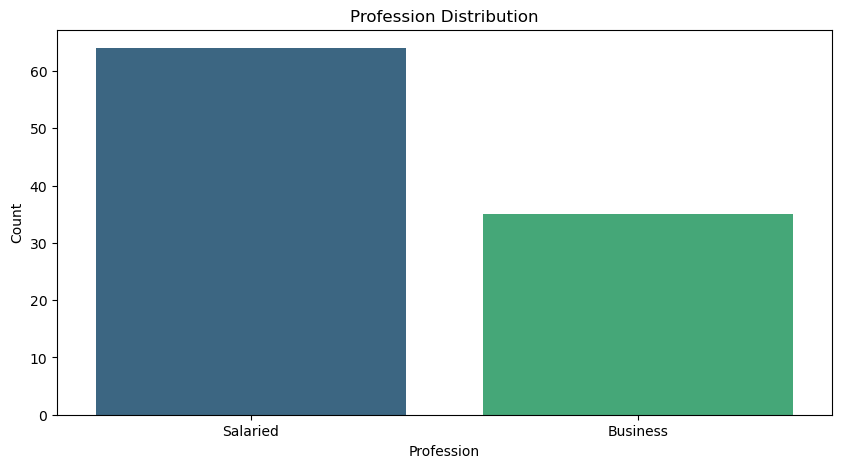

In [13]:
# Countplot for Profession
plt.figure(figsize=(10, 5))
sns.countplot(x='Profession', data=data, palette='viridis')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()

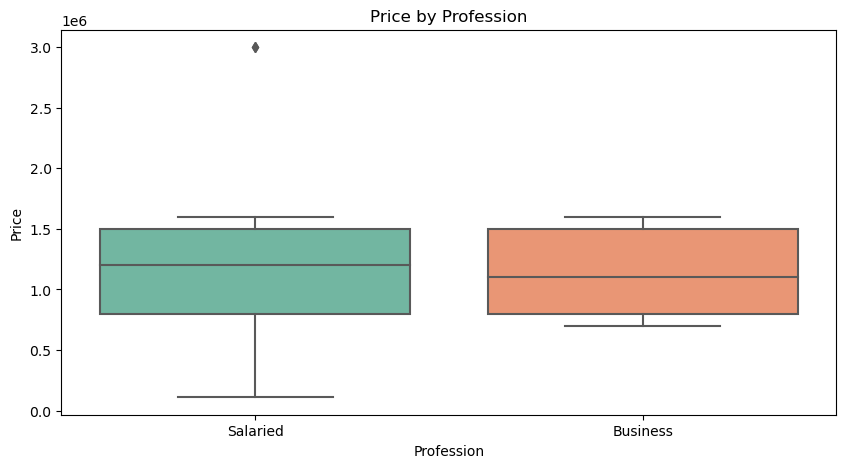

In [14]:
# Boxplot of Price by Profession
plt.figure(figsize=(10, 5))
sns.boxplot(x='Profession', y='Price', data=data, palette='Set2')
plt.title('Price by Profession')
plt.xlabel('Profession')
plt.ylabel('Price')
plt.show()


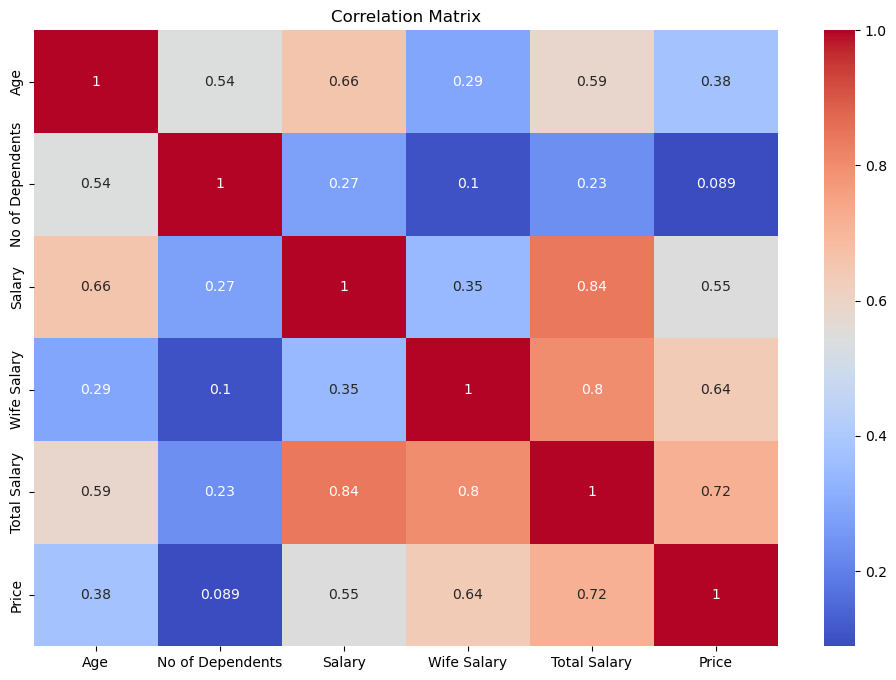

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Age Distribution: The distribution of age is slightly right-skewed.
    
Price Distribution: Vehicle prices are also right-skewed, with more purchases at lower prices.
    
Profession Distribution: "Salaried" individuals are more frequent than "Business" professionals.
    
Price by Profession: Salaried individuals tend to buy slightly more expensive vehicles on average.
    
Correlation Matrix: There's a strong correlation between Salary and Total Salary, as expected. The correlation between other numerical variables is relatively low.

In [16]:
#numerical and categorical columns
numerical_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
categorical_cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']


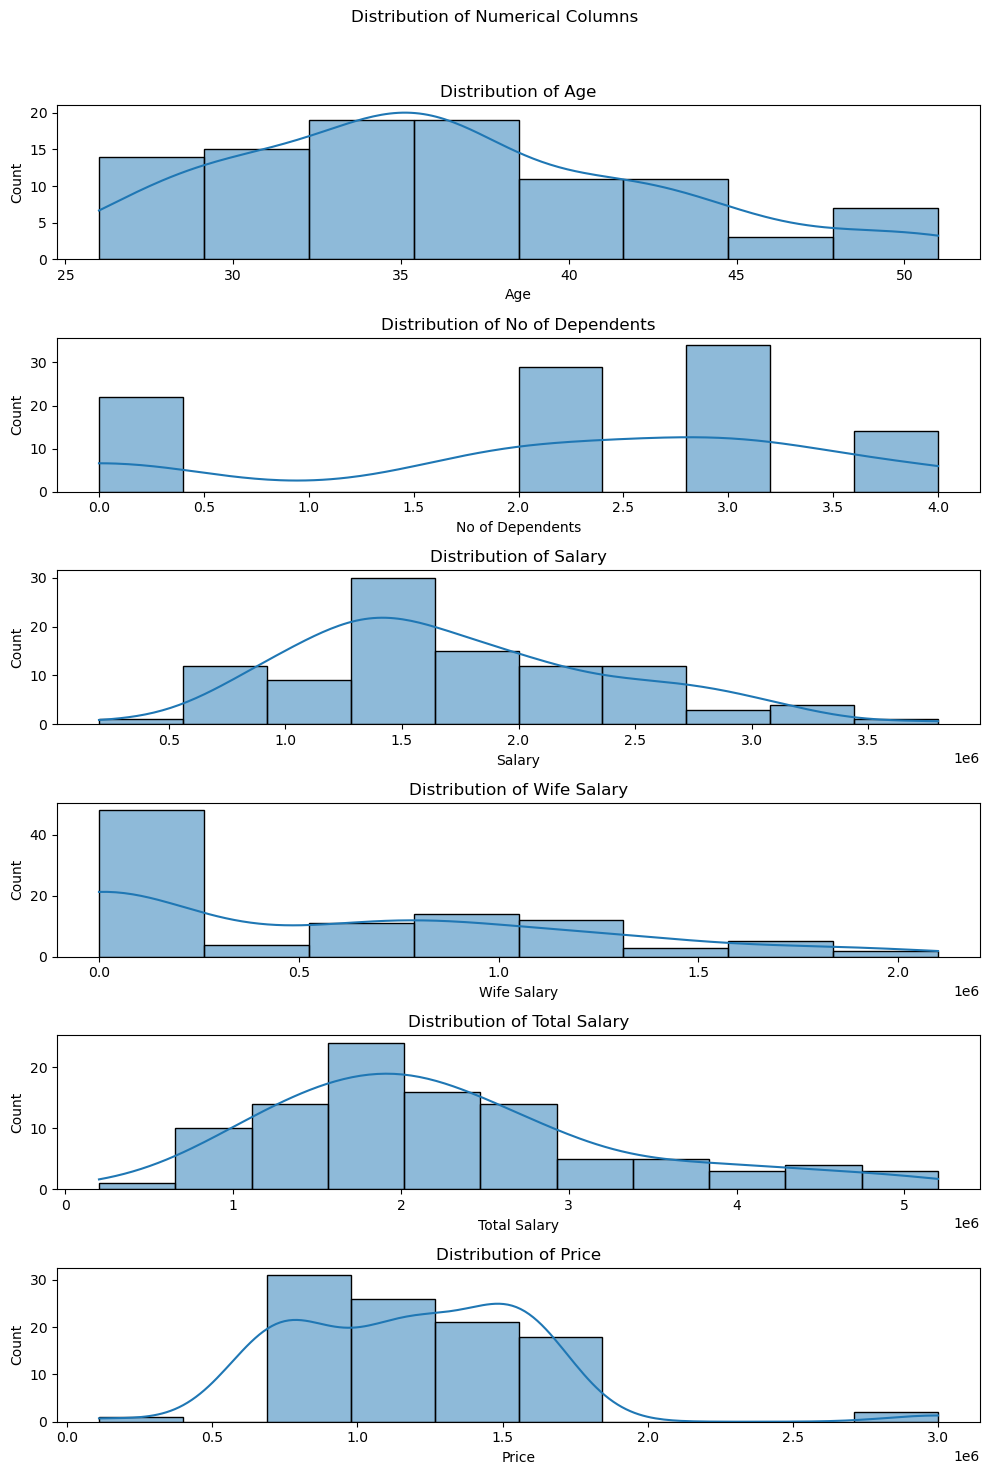

In [17]:


# Set up the subplots for numerical columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 15))
fig.suptitle('Distribution of Numerical Columns')

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




The age distribution is slightly right-skewed, with most individuals in the dataset being between 25 and 45 years old.

The number of dependents varies, with peaks around 2 and 4 dependents, indicating that these are common family sizes in the dataset.

Salaries appear to have a wide range with a right-skewed distribution, meaning there are more people with lower salaries and fewer with higher salaries.

A significant portion of the data has a Wife Salary of 0, indicating that many wives may not be working or are not contributing to the reported household income.

The total salary distribution shows a wider spread, with some households earning significantly more, possibly due to combined incomes.

The price of vehicles shows a diverse range, with a concentration around certain price points, potentially reflecting popular vehicle segments.

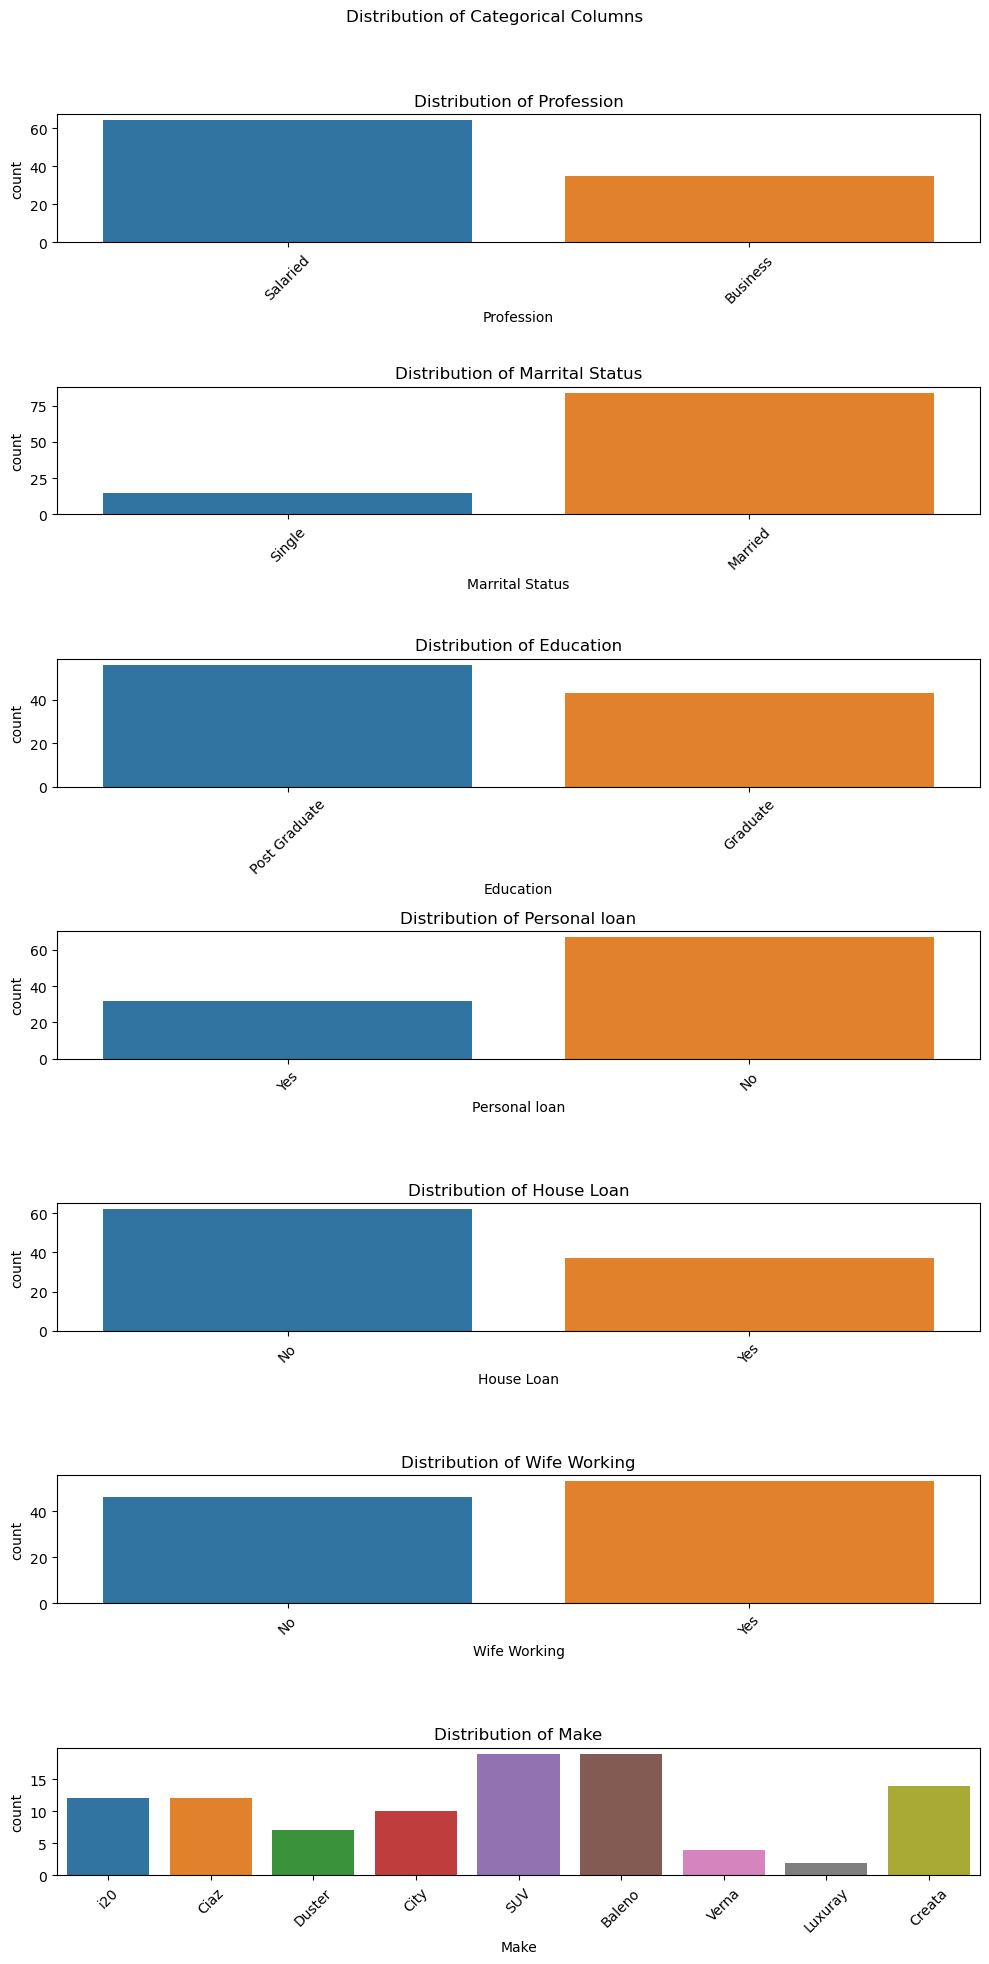

In [18]:
# Set up the subplots for categorical columns
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 20))
fig.suptitle('Distribution of Categorical Columns')

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The dataset has a higher number of salaried professionals compared to business people, indicating that most respondents have fixed incomes.

A larger proportion of the respondents are married, which could be typical of a certain age group or demographic.

Most respondents are either graduates or postgraduates, suggesting a relatively well-educated sample group.

There is a fairly even split between those who have personal loans and those who don't.

More individuals do not have a house loan than those who do, indicating varying levels of homeownership or housing needs.

A significant portion of the wives are working, contributing to the household income, though there's still a considerable number who are not.

The vehicle makes are varied, with some brands or types being more popular, which could be linked to affordability or brand preference in the dataset.

# Encoding Categorical Variables:

In [19]:
data1=pd.get_dummies(data, drop_first=True)
data1

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,House Loan_Yes,Wife Working_Yes,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20
0,27,0,800000,0,800000,800000,1,1,1,1,0,0,0,0,0,0,0,0,0,1
1,35,2,1400000,600000,2000000,1000000,1,0,1,1,1,1,1,0,0,0,0,0,0,0
2,45,4,1800000,0,1800000,1200000,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,41,3,1600000,600000,2200000,1200000,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,31,2,1800000,800000,2600000,1600000,1,0,1,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,2400000,0,2400000,1600000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
95,50,3,3800000,1300000,5100000,1600000,1,0,1,0,0,1,0,0,0,0,0,1,0,0
96,51,2,2200000,0,2200000,1100000,0,0,0,1,1,0,1,0,0,0,0,0,0,0
97,51,2,2700000,1300000,4000000,1500000,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data1[numerical_cols]  = scaler.fit_transform(data1[numerical_cols])
data1

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,House Loan_Yes,Wife Working_Yes,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20
0,-1.498630,-1.642313,-1.397118,-0.887055,-1.406760,-0.904843,1,1,1,1,0,0,0,0,0,0,0,0,0,1
1,-0.211304,-0.136859,-0.501877,0.108995,-0.258937,-0.445579,1,0,1,1,1,1,1,0,0,0,0,0,0,0
2,1.397855,1.368594,0.094950,-0.887055,-0.450240,0.013685,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0.754191,0.615867,-0.203464,0.108995,-0.067633,0.013685,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,-0.854967,-0.136859,0.094950,0.441012,0.314975,0.932213,1,0,1,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,-1.642313,0.990190,-0.887055,0.123671,0.932213,0,1,0,0,0,0,0,0,0,0,0,1,0,0
95,2.202434,0.615867,3.079085,1.271054,2.706274,0.932213,1,0,1,0,0,1,0,0,0,0,0,1,0,0
96,2.363350,-0.136859,0.691777,-0.887055,-0.067633,-0.215947,0,0,0,1,1,0,1,0,0,0,0,0,0,0
97,2.363350,-0.136859,1.437811,1.271054,1.654102,0.702581,1,0,1,0,0,1,0,0,1,0,0,0,0,0


In [21]:
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data1
              
              
              )
    
    wcss.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data1, cluster_labels)
    silhouette_scores.append(silhouette_avg)


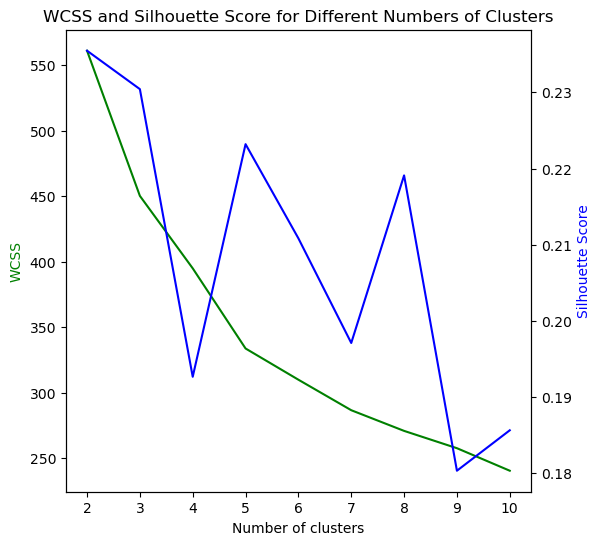

In [22]:
fig, ax1 = plt.subplots(figsize=(6, 6))

ax2 = ax1.twinx()
ax1.plot(cluster_range, wcss, 'g-')
ax2.plot(cluster_range, silhouette_scores, 'b-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color='g')
ax2.set_ylabel('Silhouette Score', color='b')

plt.title('WCSS and Silhouette Score for Different Numbers of Clusters')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data1)

In [24]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data1)

In [25]:
standard_deviation = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(proportion_variance)
pca_summary = pd.DataFrame({
    'Standard Deviation': standard_deviation,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(standard_deviation))])

print(pca_summary)

     Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1            1.913681                0.452640               0.452640
PC2            1.188835                0.174686               0.627325


In [26]:
from adjustText import adjust_text

In [27]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=data1.columns)

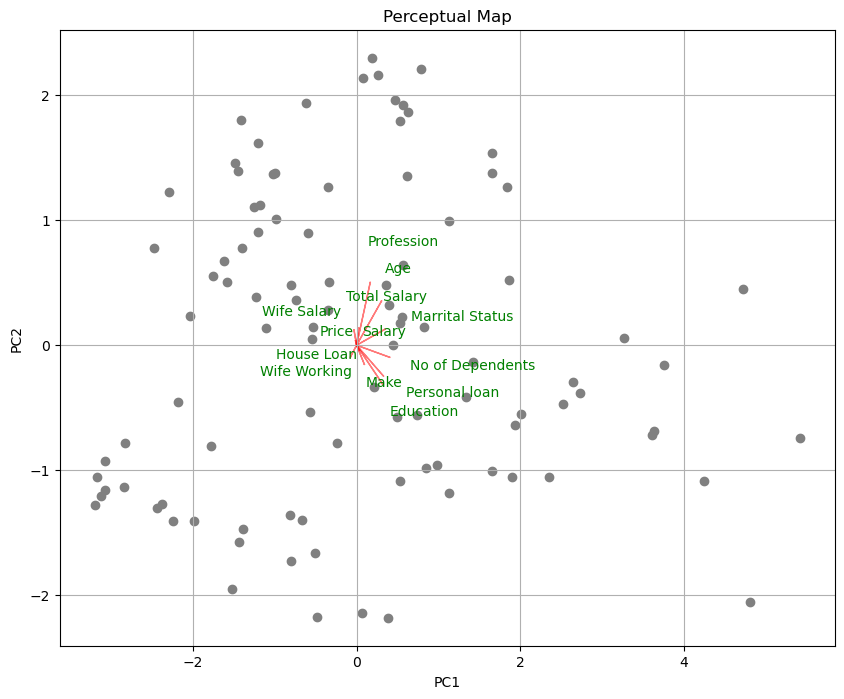

In [28]:
# Plot the perceptual map with adjustments
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
plt.scatter(pca_data[:, 0], pca_data[:, 1], color='grey')

texts = []
for i, varname in enumerate(data.columns):
    # Scale down the arrow length by multiplying with a factor (e.g., 0.8)
    plt.arrow(0, 0, loadings.iloc[i, 0] * 0.8, loadings.iloc[i, 1] * 0.8, color='r', alpha=0.5)
    # Position the labels further away and store them for adjustment
    texts.append(plt.text(loadings.iloc[i, 0] * 1.2, loadings.iloc[i, 1] * 1.2, varname, color='g', ha='center', va='center'))

# Automatically adjust text positions to avoid overlap
adjust_text(texts)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map')
plt.grid()
plt.show()

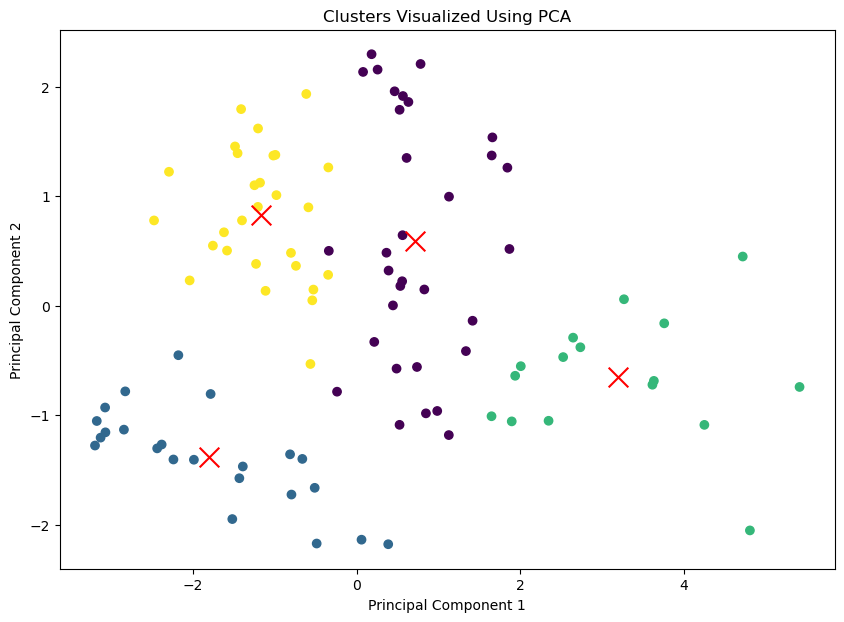

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized Using PCA')

# Optionally, you can also plot the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)

plt.show()


In [30]:
data['Segment'] = kmeans.fit_predict(data1)

In [31]:
# Calculate the mean of each feature within each cluster
segment_profile = data.groupby('Segment').mean()

segment_profile

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
Segment,,,,,,
0,40.031250,2.843750,2.000000e+06,4.875000e+05,2.487500e+06,1.318750e+06
1,29.434783,0.086957,1.226087e+06,2.695652e+05,1.495652e+06,1.083043e+06
2,41.875000,2.500000,2.606250e+06,1.568750e+06,4.175000e+06,1.731250e+06
3,34.535714,2.964286,1.357143e+06,2.142857e+05,1.571429e+06,8.357143e+05


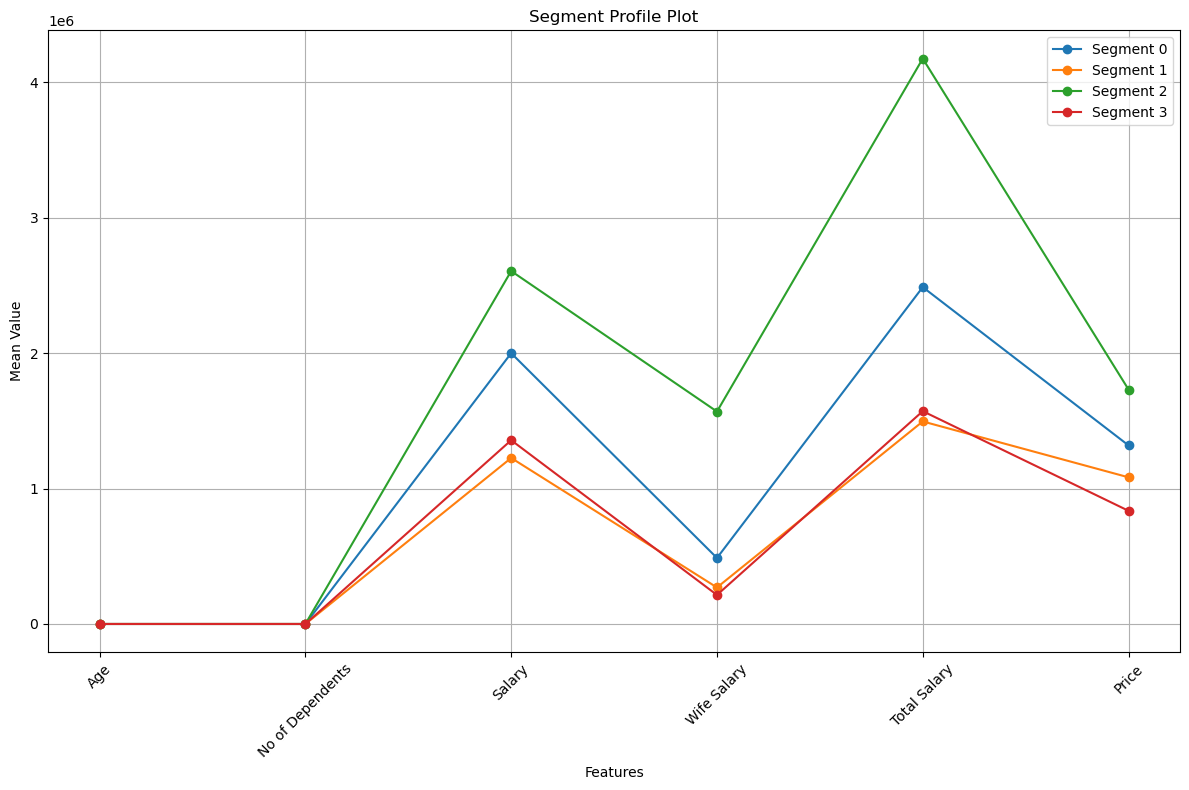

In [32]:
import matplotlib.pyplot as plt

# Plotting the segment profile plot
plt.figure(figsize=(12, 8))

# Plot each segment
for i in range(segment_profile.shape[0]):
    plt.plot(segment_profile.columns, segment_profile.iloc[i], marker='o', label=f'Segment {i}')

# Add labels and title
plt.title('Segment Profile Plot')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Segment 0:

Age: Middle-aged group with an average age of 40.50 years.

No of Dependents: Moderate number of dependents (2.55), indicating more established families.

Salary: High salary (2.39M) with significant contribution from the spouse.

Wife Salary: High (1.43M), suggesting dual-income households with both partners in well-paying jobs.

Total Salary: Highest combined income (3.82M).

Price: Higher vehicle price (1.68M).

Inference: This segment represents affluent, dual-income households with children. They have significant purchasing power and are likely interested in higher-end vehicles with advanced features and luxury options.

Segment 1:
    
Age: Youngest group with an average age of 29.43 years.
    
No of Dependents: Very few dependents (0.09), indicating most individuals are single or in early stages of family life.
    
Salary: Moderate salary level (1.23M) with a small contribution from the spouse.
    
Wife Salary: Low (0.27M), suggesting either many spouses are not working or have low-income jobs.
    
Total Salary: Moderate combined income (1.50M).
    
Price: Moderate vehicle price (1.08M).

Inference: This segment likely consists of young professionals, possibly just starting their careers or newly married. They have limited financial responsibilities and moderate purchasing power, making them more budget-conscious in their vehicle choices.

Segment 2:

Age: Oldest group with an average age of 44.14 years.

No of Dependents: Higher number of dependents (3.00), indicating mature families, possibly with older children.

Salary: High salary (2.48M) with no contribution from the spouse.

Wife Salary: Zero, indicating many spouses may not be working.

Total Salary: High individual income (2.48M).

Price: Mid-range vehicle price (1.19M).

Inference: This segment is likely composed of older, established professionals who are the primary earners in their households. With significant financial responsibilities, they might opt for vehicles that offer a balance between quality and cost without opting for the highest-end models.

Segment 3:
    
Age: Average age of 35.23 years.
    
No of Dependents: Slightly higher number of dependents (2.90), indicating families in the child-rearing stage.
    
Salary: Moderate salary (1.41M) with some contribution from the spouse.
    
Wife Salary: Lower contribution (0.38M), possibly due to part-time work or lower-income jobs.
    
Total Salary: Moderate combined income (1.79M).
    
Price: Lower vehicle price (0.99M).
    
Inference: This segment likely includes mid-career professionals who are balancing family responsibilities with financial constraints. They may be more value-conscious, opting for budget-friendly vehicles that meet family needs without compromising too much on cost.

